# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
#Run line 2 if webdriver_manager is needed. Only needs ran once and then can be commented out.
#!pip install webdriver_manager
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from splinter.driver.webdriver import BaseWebDriver, WebDriverElement

#Sets driver variable to Chrome browser
chromeOptions = Options()
chromeOptions.headless = False
driver = Chrome(service = Service(executable_path=ChromeDriverManager().install()), options=chromeOptions)

In [2]:
# Visit the website - https://static.bc-edx.com/data/web/mars_facts/temperature.html
#Sets the url and passes it to Chrome.
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
driver.get(url)

In [3]:
# Create a Beautiful Soup Object
html = driver.page_source
html_soup = soup(html, 'html.parser')

In [4]:
# Extract all rows of data from the table of Mars data. 
table = html_soup.find('table', class_='table')

mars_temp = {}
header= []
rows = []

for i, row in enumerate(table.find_all('tr')):
    if i == 0:
        header = [x.text.strip() for x in row.find_all('th')]
    else:
        rows.append([x.text for x in row.find_all('td')])

print(header)

for row in rows:
    print(row)


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

In [5]:
# Creates a Pandas DataFrame by using the list of rows and a list of the column names
# Confirms DataFrame was created successfully
rows_df = pd.DataFrame(rows)
rows_df.columns = header
rows_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [6]:
# Examine data type of each column
rows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [7]:
# Change data types for data analysis
# Confirm type changes were successful by examining data types again

rows_types_df = rows_df.astype({'sol': int, 'ls': int, 'month': int, 'min_temp': float, 'pressure': float})
rows_types_df['terrestrial_date'] = pd.to_datetime(rows_types_df['terrestrial_date'])
rows_types_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


In [8]:
# How many months are there on Mars?
# Counts month grouped by month
mars_months = rows_types_df.groupby(['month'])['month'].count()
mars_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [9]:
# How many Martian days' worth of data are there?
# Total count of days
mars_days = rows_types_df['terrestrial_date'].count()
mars_days

1867

In [10]:
# What is the average low temperature by month?
# Avg's min temp by month
avg_low_by_month = rows_types_df.groupby(['month'])['min_temp'].mean()
avg_low_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Axes: xlabel='month', ylabel='Temperature in Celcius'>

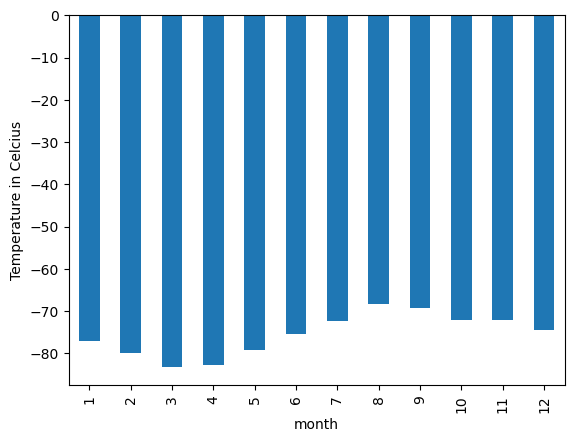

In [11]:
# Plots the average temperature by month
avg_low_by_month.plot(kind='bar', ylabel='Temperature in Celcius')

<Axes: xlabel='month', ylabel='Temperature in Celcius'>

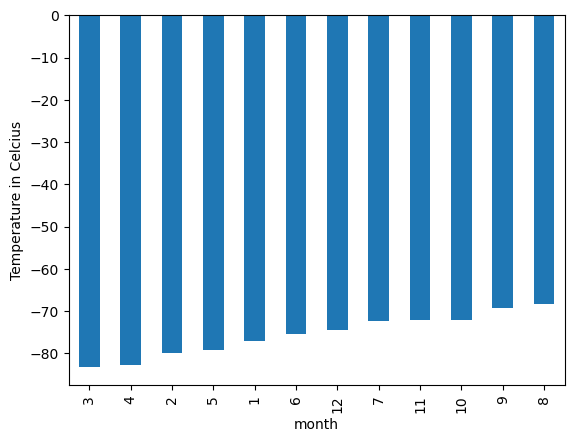

In [13]:
# Identify the coldest and hottest months in Curiosity's location
# Sorts the avg low by month so the plot shows coldest and hottest months.
sort_avg_low_by_month = rows_types_df.groupby(['month'])['min_temp'].mean().sort_values(ascending=True)
sort_avg_low_by_month.plot(kind='bar', ylabel='Temperature in Celcius')

In [14]:
# Average pressure by Martian month
# Avg pressure by month
avg_pressure_by_month = rows_types_df.groupby(['month'])['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: xlabel='month', ylabel='Atmospheric Pressure'>

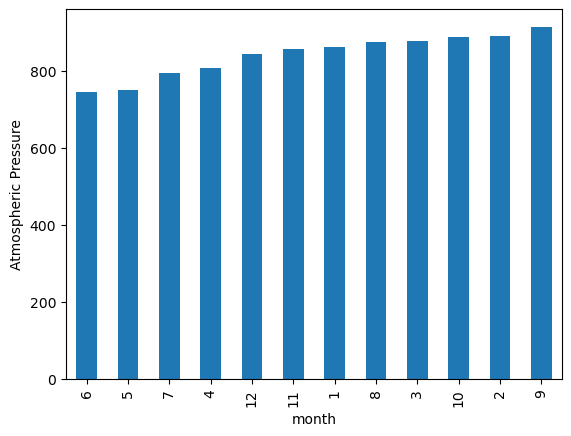

In [15]:
# Plots the average pressure by month
sort_avg_pressure_by_month = rows_types_df.groupby(['month'])['pressure'].mean().sort_values(ascending=True)
sort_avg_pressure_by_month.plot(kind='bar', ylabel='Atmospheric Pressure')

<Axes: xlabel='Number of Terrestrial Days', ylabel='Minimum Temperature'>

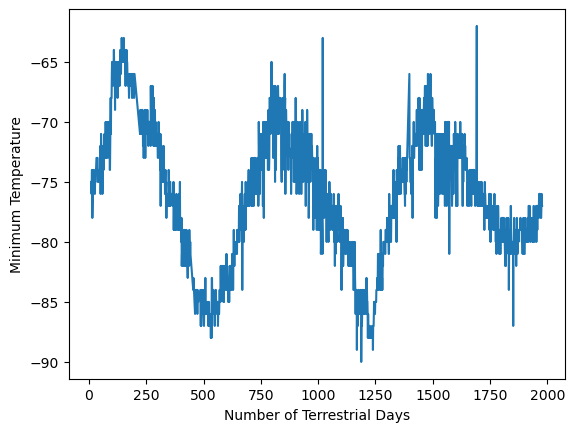

In [17]:
# How many terrestrial (earth) days are there in a Martian year?

#Determines the avg min temp by terrestrial days and then plots the results.
days_mars_year = rows_types_df.groupby(['sol'])['min_temp'].mean()
days_mars_year.plot(kind='line', xlabel='Number of Terrestrial Days', ylabel='Minimum Temperature')

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [18]:
# Write the data to a CSV
rows_types_df.to_csv('MarsWeatherData.csv')


In [19]:
# Exits the controlled browser.
driver.quit()
